In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
dat = pd.date_range(start="2020-01-30",end="2020-05-20")

In [4]:
dat

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', length=112, freq='D')

In [5]:
cols_to_use = ['Date', 'Total Confirmed','Total Recovered','Total Deceased'] # or [0,1,2,3]
dataC = pd.read_csv('case_time_series.csv', usecols= cols_to_use)

In [6]:
dataC.head()

,Date,Total Confirmed,Total Recovered,Total Deceased
0,30 January,1,0,0
1,31 January,1,0,0
2,01 February,1,0,0
3,02 February,2,0,0
4,03 February,3,0,0


In [7]:
dataC["Dates"] = dat

In [8]:
dataC["Total"] = dataC["Total Confirmed"] - (dataC["Total Recovered"]+dataC["Total Deceased"])  
#'Total' represents Total Active Cases

In [9]:
dataC = dataC.drop(["Date","Total Confirmed",'Total Recovered','Total Deceased'],axis = 1)

In [10]:
dataC.index.freq = 'MS'
dataC.head()

,Dates,Total
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [11]:
dataC.tail(4)

,Dates,Total
108,2020-05-17,55879
109,2020-05-18,57894
110,2020-05-19,60870
111,2020-05-20,63172


In [12]:
dataC.to_csv('actives.csv', index=False) 

In [13]:
df = pd.read_csv('actives.csv',index_col='Dates',parse_dates=True)

In [14]:
df.index.freq = 'D'
df.head()

,Total
Dates,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3


In [15]:
#df = df.loc[~(df==0).all(axis=1)]    CANNOT DELETE DATES WITH '0' VALUE, THEREFORE REPLACING THEM WITH 1
                                      #Model doesn't support any discontinutiy in dates and '0' values  
    
df['Total'] = df['Total'].map( lambda x : 1 if x == 0 else x)

In [16]:
train_data = df.iloc[:113] 
test_data = df.iloc[72:]

In [17]:
train_data.shape

(112, 1)

In [18]:
test_data.shape

(40, 1)

In [19]:
train_data.head(5)

,Total
Dates,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3


In [20]:
df

,Total
Dates,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
2020-02-04,3
2020-02-05,3
2020-02-06,3
2020-02-07,3


In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
fitted_model = ExponentialSmoothing(train_data['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [23]:
test_predictions = fitted_model.forecast(40).rename('Active Cases Prediction')

In [24]:
test_predictions

2020-05-21     64786.800877
2020-05-22     67615.408879
2020-05-23     69607.683664
2020-05-24     71337.766012
2020-05-25     73485.938135
2020-05-26     76381.160940
2020-05-27     79251.016852
2020-05-28     81427.630017
2020-05-29     85160.071707
2020-05-30     88696.184962
2020-05-31     93047.096303
2020-06-01     96754.012573
2020-06-02     98952.859825
2020-06-03    103273.166543
2020-06-04    106316.090177
2020-06-05    108958.551199
2020-06-06    112239.586410
2020-06-07    116661.638009
2020-06-08    121044.945194
2020-06-09    124369.420157
2020-06-10    130070.207575
2020-06-11    135471.130518
2020-06-12    142116.544617
2020-06-13    147778.345496
2020-06-14    151136.779944
2020-06-15    157735.449724
2020-06-16    162383.093869
2020-06-17    166419.086874
2020-06-18    171430.413455
2020-06-19    178184.484440
2020-06-20    184879.378701
2020-06-21    189957.053483
2020-06-22    198664.216217
2020-06-23    206913.377522
2020-06-24    217063.326601
2020-06-25    225710

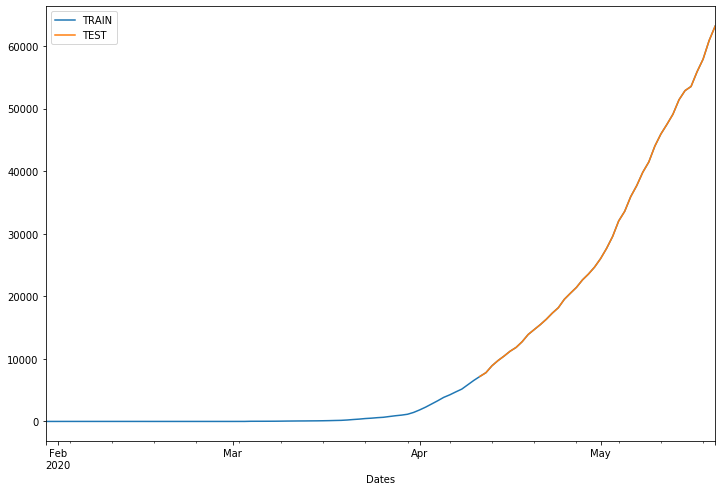

In [25]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))

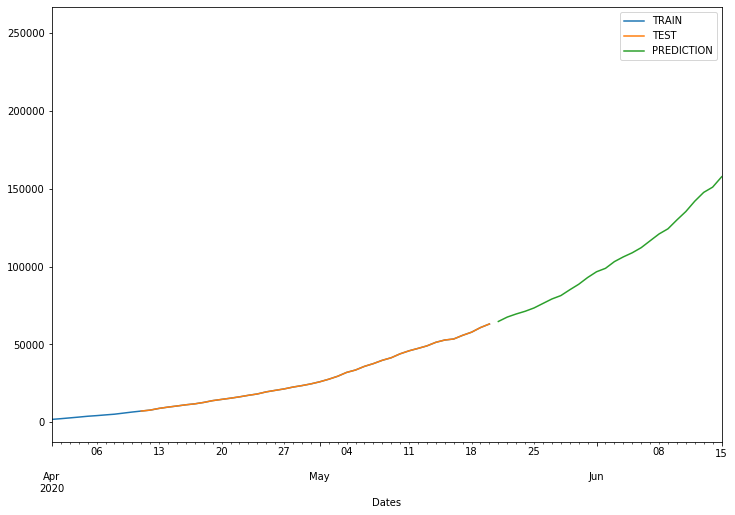

In [26]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-04-01','2020-06-15']) #Specify Date to see prediction

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
mean_absolute_error(test_data,test_predictions)

109640.05374254077

In [29]:
mean_squared_error(test_data,test_predictions)

13569723245.319347

In [30]:
np.sqrt(mean_squared_error(test_data,test_predictions))

116489.15505453436

In [31]:
test_data.describe()

,Total
count,40.00000
mean,29840.95000
std,17050.82986
min,7191.00000
25%,15263.75000
50%,25331.50000
75%,44476.00000
max,63172.00000


In [32]:
final_model = ExponentialSmoothing(df['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [33]:
forecast_predictions = final_model.forecast(40)

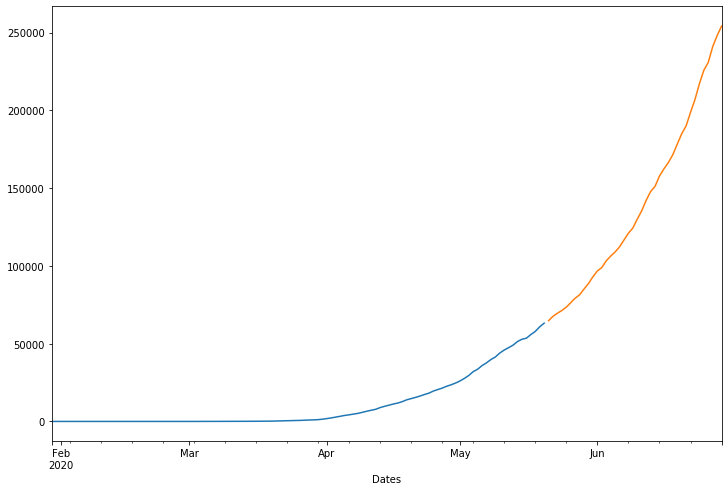

In [34]:
df['Total'].plot(figsize=(12,8))
forecast_predictions.plot()